<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install --quiet vietocr

     |████████████████████████████████| 948 kB 27.3 MB/s 
     |████████████████████████████████| 280 kB 62.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


# Inference

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
config = Cfg.load_config_from_name('vgg_transformer')

# config['weights'] = './weights/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp6bq76dmk/dl
100%|██████████| 152M/152M [00:03<00:00, 38.3MB/s]


In [23]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip
! rm sample.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 121MB/s]


In [21]:
import glob
import time
dir = "./Vietnamese-HTR/data/0825_DataSamples_1"
def infer(detector, image_dir, image_extension):
    times = []
    for path in Path(image_dir).rglob('*.'+image_extension):
        img = Image.open(str(path))
        plt.imshow(img)
        start = time.time()
        s = detector.predict(img, return_prob=True)
        end = time.time()
        times.append(start-end)
        print(s)
        plt.show()
    print("Average inference time: ", sum(times)/len(times))

# Prepare the dataset
Very large dataset (594.000 images)
- en_00: 100000
- en_01: 100000
- vi_00: 100000 
- vi_01: 100000 
- Các ảnh có màu giấy (màu nền) khá giống nhau
- meta: 144000 
- random: 50000

Vietnamese Handwritten Address Dataset
- train: 1829
- test: 549

MCOCR2021
- train: 1546
- test: 390

BKAI Scene Text
- train: 
- test: 


## Crawl datasets


Vietnamese Handwritten Address Dataset

In [7]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git
!pip install -r ./Vietnamese-HTR/requirements.txt

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 5072, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 5072 (delta 46), reused 20 (delta 9), pack-reused 4987
Receiving objects: 100% (5072/5072), 517.73 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (143/143), done.
Checking out files: 100% (4802/4802), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 29.8 MB/s 
     |████████████████████████████████| 409 kB 71.7 MB/s 
     |████████████████████████████████| 140 kB 73.7 MB/s 
     |████████████████████████████████| 596 kB 55.8 MB/s 
     |████████████████████████████████| 1.1 MB 64.1 MB/s 
     |████████████████████████████████| 94 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 73.9 MB/s 
     |████████████████████████████████| 271 kB 75.4 MB/s 
  Attempting uninstall: PyYAML
    Found existin

BKAI Scene Text

In [ ]:
! gdown https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
! gdown https://drive.google.com/uc?id=1_Z4zY2Wk7vtxepUhUzttfddkM2b9cap2
! gdown https://drive.google.com/uc?id=1AhEwdTOxByNiHLfZcxFm83ZtPivxGJlS
! gdown https://drive.google.com/uc?id=1PLW2eGsMSVXZahZ7GvEz5Kr1uvyLnxbx
! unzip -qq -o ./vietnamese_original.zip -d ./scenetext_dataset
! unzip -qq -o ./train_imgs.zip -d ./scenetext_dataset
! unzip -qq -o ./train_gt.zip -d ./scenetext_dataset
! unzip -qq -o ./public_test_imgs.zip -d ./scenetext_dataset
! rm ./vietnamese_original.zip
! rm ./train_imgs.zip
! rm ./train_gt.zip
! rm ./public_test_imgs.zip

Downloading...
From: https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
To: /content/vietnamese_original.zip
100% 1.05G/1.05G [00:03<00:00, 276MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_Z4zY2Wk7vtxepUhUzttfddkM2b9cap2
To: /content/train_imgs.zip
100% 96.2M/96.2M [00:00<00:00, 265MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AhEwdTOxByNiHLfZcxFm83ZtPivxGJlS
To: /content/train_gt.zip
100% 166k/166k [00:00<00:00, 71.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PLW2eGsMSVXZahZ7GvEz5Kr1uvyLnxbx
To: /content/public_test_imgs.zip
100% 68.2M/68.2M [00:00<00:00, 339MB/s]


MCOCR 2021

In [ ]:
! gdown https://drive.google.com/uc?id=1FgCnaotis_NKTbgXdviTTDhrM2AvsdTT
! gdown https://drive.google.com/uc?id=1xL1NHwf00WWJUsPcS4plZEDmTPQqGUsW
!unzip -qq -o ./mcocr2021_private_test_data.zip -d ./mc_ocr
!unzip -qq -o ./mcocr2021_public_train_test_data.zip -d ./mc_ocr
!rm mcocr2021_private_test_data.zip
!rm mcocr2021_public_train_test_data.zip

Downloading...
From: https://drive.google.com/uc?id=1FgCnaotis_NKTbgXdviTTDhrM2AvsdTT
To: /content/mcocr2021_public_train_test_data.zip
100% 355M/355M [00:05<00:00, 68.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xL1NHwf00WWJUsPcS4plZEDmTPQqGUsW
To: /content/mcocr2021_private_test_data.zip
100% 89.9M/89.9M [00:00<00:00, 111MB/s]


VietOCR 1M

In [ ]:
! gdown https://drive.google.com/uc?id=1vi9zY9_jnpqTGkBJ-eSt7tnnWEYTHuFr
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
! unzip -qq -o ./ocr_dataset.zip -d ./ocr_dataset
! unzip -qq -o ./data_line.zip -d ./ocr_dataset
! rm -rf ./ocr_dataset/InkData_line_processed/
! rm data_line.zip
! rm ocr_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1vi9zY9_jnpqTGkBJ-eSt7tnnWEYTHuFr
To: /content/ocr_dataset.zip
100% 7.71G/7.71G [01:18<00:00, 98.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
100% 61.2M/61.2M [00:00<00:00, 368MB/s]


Test data

In [16]:
! gdown https://drive.google.com/uc?id=16kDWDrNOxUmG1hNkE24fJ1fra8Pr_Jj-
!unzip  -qq -o ./DataCVOCR-20220720T235132Z-001.zip -d ./test-data
! rm DataCVOCR-20220720T235132Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=16kDWDrNOxUmG1hNkE24fJ1fra8Pr_Jj-
To: /content/DataCVOCR-20220720T235132Z-001.zip
100% 81.8M/81.8M [00:01<00:00, 56.5MB/s]


## Exploit, reorganize to VietOCR training format

In [ ]:
!ls -a ./ocr_dataset/meta

Visualize some images

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [30.00, 30.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("/content/mc_ocr/mcocr_public_train_test_shared_data/mcocr_train_data/train_images/mcocr_public_145013ddcph.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im)
plt.show()

('Gull tìa, Nước, Hình pvới đã lợp, lâm đồng', 0.7289301944630486)


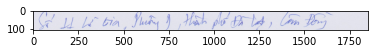

('Số 40/32 Nguyễn Tát Thành, Phường Từ An, TP. Buôn M4 Thuật, Đák Lã', 0.8580545830455694)


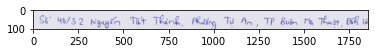

('Số 183 UE Thaih Phung, Phương 8, Tuy Hoa, Phú Yên', 0.8648867108383957)


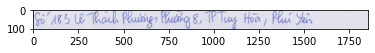

('3547/66]1 Phan Văn Tự, Phuồng 11, Quáo Bình Thanh, Phố Chí Minh', 0.8488369321539289)


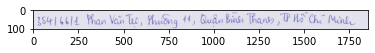

('Xin 46, quốc Ló 5, Thị trấn Lai Lạch, Huyện Lầm Giang, Hà Dương', 0.8553425854160672)


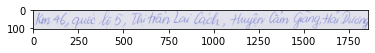

('Xến 3, Thôn Câu, Xã Minh Đức, Huyện Ưng Hơa, Hà Nội', 0.8762654314438502)


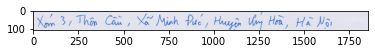

('Km 21, Quii Lê 5A, Thần Béi, Xã Bạch Sam, Auyên Mỹ Hào, Nứng Yên', 0.8661633082665503)


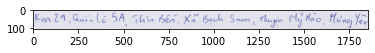

('Thôn 4, xã Giới Phiên, Thanh, phố Yên Bài, Xêm Bái', 0.8516506677865983)


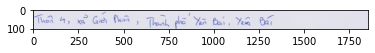

('1981 S8129 Tan Lập 1, Khu phố 3, Phường Hiệp Phú, Quản 9, TP Hồ Chí Nuất', 0.8143623125635915)


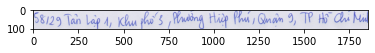

('USIG Trưởng Eông Đình, Phường 14, Quân Tan Bình, TP Hệ Shí Minh', 0.8084134511531346)


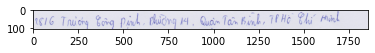

('362/6C Ung Văn Khiêm, Phường 25, Quân 3ình Thạnh, Tp Hà Chí Mính', 0.9056980633176863)


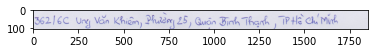

('TLI pho 05 Hồ, Quoc Bi Thanh Bì Thị Thuận', 0.608988443889269)


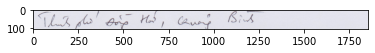

('Xã Minh Bao, Xã Minh Bảo, Thành phố Yên Bái, Yên Bai', 0.8780703475842109)


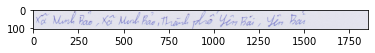

('23/34 đường 16, Phường 4, huận 3, 17 Hồ Chị Minh', 0.8479094204182426)


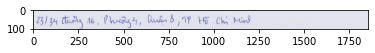

('Số 106 tran Hưng Đao, Khu vùc 5, phiếng V1, Tp Vị Thanh, Hùu Giang', 0.882433039672447)


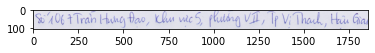

('94 Tô Hai tranh, Quân Hai Bị Tướng, Hà Nội', 0.8338491160954747)


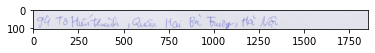

('Ba/Gấp Nỹ Đoàn 1, Xã Trung Chanh, Giuyện Húc Nàu, TP Kê Chế Ninh', 0.8172788096126169)


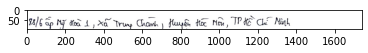

("Số 'C2, Trân Nguyên Hãn, Thường 2, Thanh phố Bảo Lộc, Lâm Đồng", 0.8924208711231908)


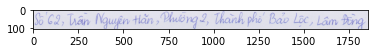

('S3 011 85 7 plunt Aul A, oul Bi Ta Pham H.', 0.670920250316461)


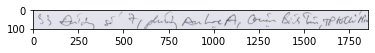

("58 ' 161, phó Phùng Hưng, Phương Cửa Đồng, Quân-Hoàn Kiêm, Hà Nội", 0.8483269902376028)


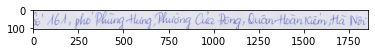

('6 21 Đồng đa, Phương Phú Nhuận, Thành phố Huế, Thừa Thiên ?Huế', 0.8768441359842977)


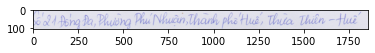

('13 - Chỉ Về 4, Thí Trấn Đức Phế Huyện Được Phó Quan, Ngoài', 0.7527963782435861)


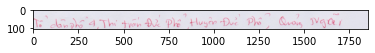

('Khu 02, Xã Đai Đồng Thyên Vũi Tương Tĩnh Phúc', 0.8457301583555009)


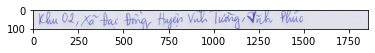

('Khu phố " Phưới Hậu 1, Phương 9, TP Tuy Hoã, Phú Yêu', 0.8623670534445689)


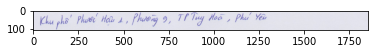

('Số 48A Lý Chiến Tháng, Phường Tần An, TP. Buồn Ma Phuốt, Đốc Lắc.', 0.8794903608468863)


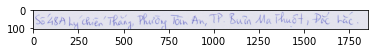

('21/48 Van Kiếp, Phường 3, Quân Bình Thanh, TP Hồ ? Chí Minh', 0.8830746770915339)


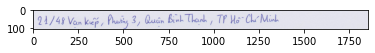

('Số 3472, Đường DDF-1, phường Tân Hưng Thuận, Quận 12, TP-Hồ Chí Minh', 0.8813965206637102)


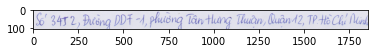

('466/4 Lê Quang Đình, Phường 11, Quận Bình Thạnh, TPHố Chí Minh,', 0.8821385985329038)


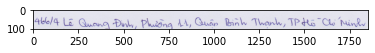

('Thôn Phúc Thanh, Huyện Lâm Hã, Lam Đông', 0.8973607466771052)


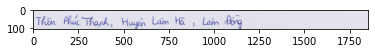

('Khu S, xã Tiên hưởng, Huyện Cầm IChế, Phú Tho', 0.8862540688779619)


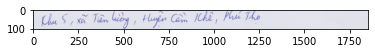

('49] Tiần Phú, thành phủ bủ lộc, Lâm Đây', 0.8282100672905262)


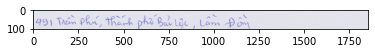

('Số 106, Lê Lội, (hướng Hải Pình, Thành phố Đồng Hới, Quảng Bình', 0.8546569477471094)


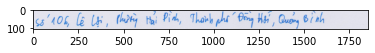

('Nó Võ Văn Bình, Cộ 4B Xã Bình Mỹ, Nuyện Lễ OW, N HGM', 0.7744529688587556)


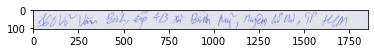

('17 Hùng Vương, Thanh phố Tam kỳ, Quảng Nam', 0.8916557314140456)


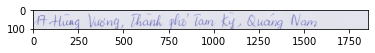

('Thôw Phong Doanh, Xã Bình Dương, Huyện Vĩnh Tưởng, Vinh Phúc', 0.8973281557361285)


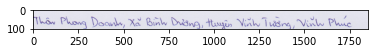

('Gỗ 6G10, Khim 1, Nơi Tiền Lan Vung, Muận Lườ Vmy, Đồng Nam', 0.720689125615975)


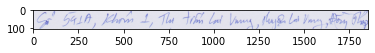

("2380 Fướng Số 4, Phường 10, Quận Tàn Binh, TP-Hồ Chi'Minh", 0.859046128758213)


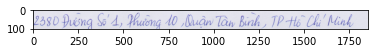

('393 J12 122 Hoang Sa, Phường 09, Auận 3, TP Hồ Chí Nhính', 0.8625256115836757)


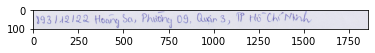

("214 Đường Hoa Han, Phiếng 02, Quận Phú Nhuân, TP Hs' CHí Minh", 0.8236914391888946)


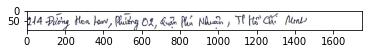

("68 Nguyễn Huệ, Phương bên Nghệ, Quận 4, TPHố Cho'Muah", 0.8158871674875043)


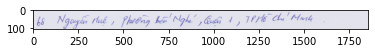

('23 Lê Thị Kường Phường Bản Thanh Quận 1, TP Hà Chí Mùi', 0.8404014990837486)


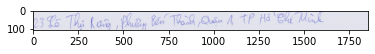

('Nhón Giới Lễ Knr Nopp Viên Queày), Xà phú Liên, Kuyis Nếu Du, Bõ Mụ', 0.7937696591686847)


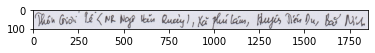

('J0/3 Cao Văn Ngọc, Phuống Phú Tung, Quận Tân Phúc, TP Hồ Chí Minh', 0.8804849294515756)


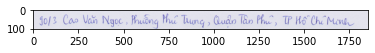

('103/IR Nguyễn Văn Huy Phước Đa Xao, Đuân 1, TP. Hồ Chỉ Ninh', 0.8309492529448816)


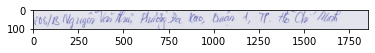

('Số A90 A/45, Ấp Long Thuận A), Xấ Long Phước, Huyện Long Hồ, Vĩnh Long', 0.8692886646304812)


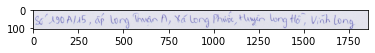

('Tổ chin phố Thống N/had, Phương Deloreg Nơi, Quận Hì Đông, Hồi Nar', 0.7777700290986986)


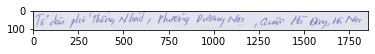

('87 đường 1914, Phường Xuân An, Banh, phổ Phan Niết, Bình Nuân', 0.842951421122082)


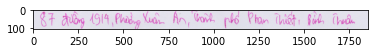

('Số 24%S Đ?37, Áp Bóng 1xau], Xã: Khaul Aut, Huyện Gồ Dầu Túy Mũ', 0.7704485931566784)


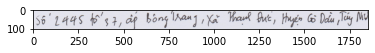

('Số 9, Xổ dân phố Phư Thủ, Phương Tây Mô, Quận Nam Từ Liêm, Hà Nà', 0.8655476791318506)


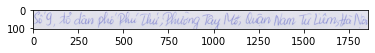

('Số 324, Ấp 4, Xã Vì Binh, Huyện Vì Thuỷ Hậu Giang', 0.8887271491848693)


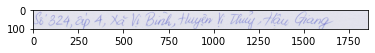

('457/6815 HLBD, ÂP CHÁNH LỘC, THÀNH PHỐ THỦ DÂN MỘT, BỆNH DƯỜ', 0.8434222504496575)


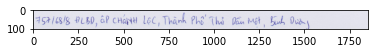

('Số nhà 02t, á Lừ, thường Tâu Phú, Thanh phố Bắc Giang, Bắc Giang', 0.8720459416508675)


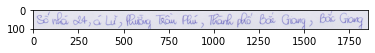

('761A Điên Biên Phổ, Phương 25, Quả Bình Thaoh, TPHó Chí Muốc Như Thị', 0.7222718661103178)


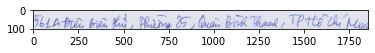

('Thôn Tư Pướng, Xat Cao Hành, Huyện Ung Hoà, Hà Nột', 0.8681277376413346)


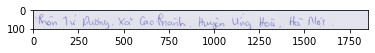

('8A-8B Trần Thiệu Luật, Phương 6, Quận Tần Bình, TP Hồ Chí Mình', 0.9002521960966049)


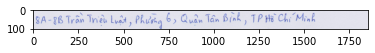

('Phiếu Năn Huyền Thâu Hoá, Thanh Hoa Kỳ', 0.8071505843024505)


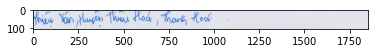

('B2y Đường Đạ, phường ăn Thứ Như, Auàn2, TPHê Chí Minh', 0.8185477380482655)


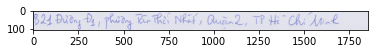

('Khu loàng nghề, Xã Sơn Vi, Huyện Làm Thao, Phúi Tho', 0.9033597088327595)


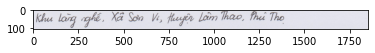

('863 Trường Sa, Phường 03, Quận 3, TP Hồ Chí Minh', 0.9078489889701208)


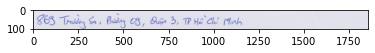

('BM Ấp Xớm Mỹ Lượng Thị Bim Huyện Cầu, Thai, Dây Diệc', 0.7085063203882712)


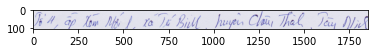

('Khác 9, Dụ thân Tâm kỳ, Huyện Tcán kg, Nghị An', 0.7733733022342557)


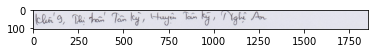

('Bị Lê Mịnh Bằng Xã Thai Yên, A, Huyến, UMinh Thiêng, Kiên Giang', 0.811288818835266)


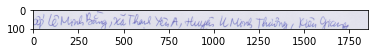

('547 Đường Điện Biên Phu; Phường 25, Quận Bình Thạnh, TP Hồ Chí Minh', 0.8777804254595913)


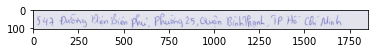

('M Bis Nguyễn Gia Thiếu P.06, Phường 06, Quốw 3, TP-Hồ Chí Anh', 0.8804399845052938)


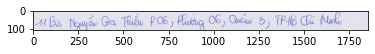

('C157/10A Tổ 11, Ấp 31. Xô Vĩnh Lọc A, Huyện Bình Chanh, TP.11? Chí Minh', 0.8662617613731975)


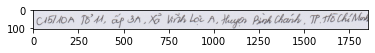

('Ap Thanh, Hòa, Xã Thạnh, Hôi, Thứ Kế Tàn Uyên, Binh, Dương', 0.8157097342713125)


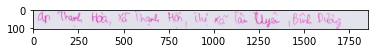

('47/6 Hồ Biểu Chân l, Phường 11, Quận Phú Nhuận,TP Hồ Chủ Minh', 0.8561571873113757)


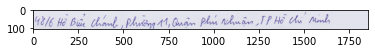

('860 P6/10 Huynh Tái Phát Phương Tâu Phú, Quận 7,TP, Hễ Co Mỹ', 0.821181470155716)


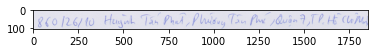

('3 A2 Nguyễn Thường Hiến Pluiởng 5, Quân Binh Thạnh, TP Hồ Chí Minh Thứ Nhiều', 0.7952394216860595)


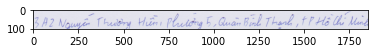

('Sông Tư, Thị xá Kỹ Anh, Hà Tình', 0.8418412299886826)


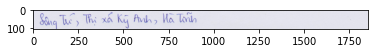

('Kim Uào, Phương Bình Định, Tbì Xã An Nhồn, Bình Định', 0.8370507663259139)


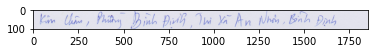

('A8 Phan Chu Tinh, P. Quang Vĩnh, Hành (Cổ Bản Hoà, Đông Nai', 0.8712203704704673)


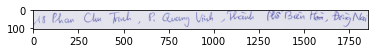

('Tần Thường, Huyện Chở Lạch, Bến Te', 0.8654981641208425)


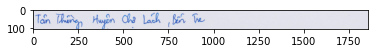

('KPNinh Thịnh, Thị tân lớt Ninh, kuyên lộc Ninh, Bình Phuốc', 0.8387740007762251)


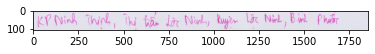

('A741 khu 34, Song cllau, Thanh Phố Bác Giang, Bài Giang', 0.8606746110049162)


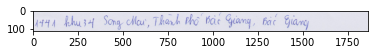

('16? 5, Khái Bó lập, Phườ, Van Phúc, Đuán (tà fông, Hà Nội', 0.7597604545584896)


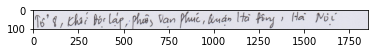

('195A bũi minh bức, phương 6, luận 8, TP Ham', 0.8036875821823297)


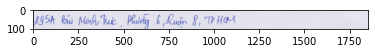

('Khu CN Đồng Văn, Thị Tiên Đồng Văn - Huyện Duy Tiên, Hà Nam', 0.8566253632307053)


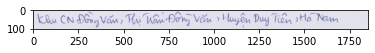

('Sẽ So đường Để Là Thành phương ở Chị Dước, Quốn Đông đa, tế Nãi', 0.7446141647441047)


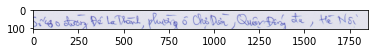

('SV 246 F. 12, Khn phế A3, phường An phú, Ix Tui, An, Binh Dương', 0.8569626089126344)


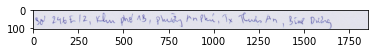

('Sở 10, đường phố Quang, Phường 2, Quận Tân Bình, TP Hồ Chí Vinh', 0.8553140868270208)


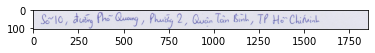

('Dò 459, phò Nguùi, phương vinh Tuy, Quân Hạc hà Trung, Hà Nội', 0.8280972811530848)


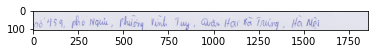

('Tiên Tiến Hoà, Xã Xên Hội, Huyền Đức Tộ, Hồa Tỉnh', 0.8163253938665196)


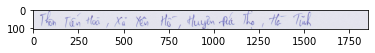

('A67 Bạch Đảng, Phường 2, Quân Tân Bình, TP. Hà Chí Minh', 0.8711325775493275)


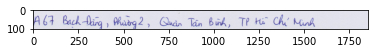

('Sa/260 Khưởng Đanch, Phương Ha Đoạch, Quận Thonh Xuân, Hà Vội', 0.8369276814284872)


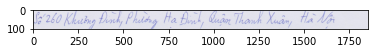

('S6 958, đương La Thành, Phường Ngọc Khánh, Quân ba Đình, Hà Nội', 0.8878926937542264)


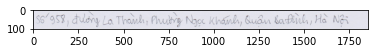

('22B nhưc Phiên Dự, Phường Phước Lng Béalpr?Như Trong, tbcb Hoà', 0.7456354426760827)


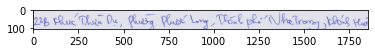

('88-90 Bạl Văn Phường 05, Quan 5TP Hs Ok Ninh', 0.8325980759479783)


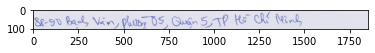

('Vhó Lê Lương, Thị Nân Đầm Hà, Huyện Đâm Ha, Quảng Ninh', 0.854795053601265)


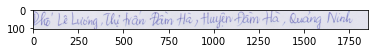

('Chỉ lý Hòa, xã Hỏu Tnạch, huyện bỏ Trạch Quảng binh', 0.8421381264925003)


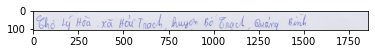

('34 Đảo Dung T.7, Phương lộc Nhất, Thành phố Is ảo lộc lớn Đình', 0.8600709654631153)


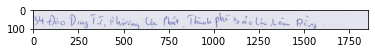

('Cấp Phú Giao,TT Ngôi Giao, Huyện Chân Đức, Bà Lịn - Vùng Tàu', 0.8745471601684888)


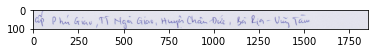

('107 Hàng Bàng, Phương 06, Quản 6, TP Hồ Cứ Minh', 0.8406152630105932)


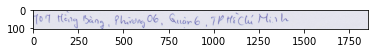

('Tô Lịch, Auring Làm Tích, Thái phíc (ain phá, Quày Nich', 0.762031485546719)


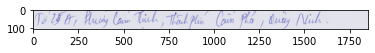

('Khu lên Thao, Phi trần làm Phạc, Huyện lâm Thao, Phú Thọ', 0.8664277360907623)


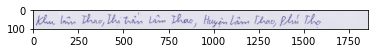

('Số4 dãy bý Acha phổ bị Phường la Khí, luận Hà Đồng, Hà Nội', 0.8282208238439314)


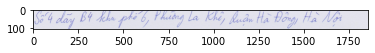

('Khôi 10 - Thị Hiện Thạch Hà, Huyện Thạch Hà Mã Ninh', 0.8603747171514174)


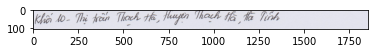

('Đội 3, Thôn Thọ Sôn, Xã Quang Hưng, Huyện Ninh Giang, Hải Dường', 0.9076805609086204)


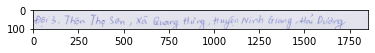

('gVẽ Văn Tan, Phương 06, Quang, TP Hồ Chí Mịnh', 0.7936558246612548)


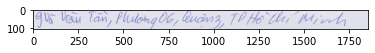

('57 - Lê Năn Sĩ, Mulêu Hoã Minh Quận Lớn Chiếu. Đã Naing', 0.8362637893720106)


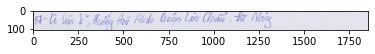

('Thôn Hòa làm, xã Trường lâm, Huyện Tỉnh Gia, Thanh Hóa', 0.8783423161065137)


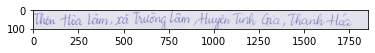

('ấp cái Gó, xó Long Vinh, Huyện Duyeu Hải', 0.8105799831449986)


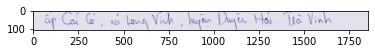

('A3/7 X/3 Ấp/4, Xã Vĩnh Lộc B, Huyện Bình Obinh, TPHá Chí Ninh', 0.8804217191016088)


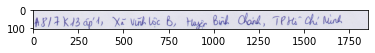

('Đò, 9 thôn An Toàn, Xã (ấm Định, Huy Lớn Lám Giàng, Ha, Dương', 0.8630938422484477)


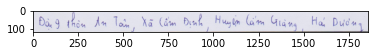

('Thôn Chánh Thữa, Xã Coá Thanh, Thuyên Phủ Cat, Bình Đinh', 0.8383720857756478)


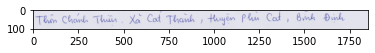

('Thi Thần Trên Cao , Thị Đến Trên (Cao,(Tuyên Phù Có, Hoàng Văn', 0.8025456344889056)


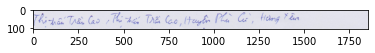

('Khu 8 thi tân Phu Bai, Thị xã Hưởng Thủy, Thừa Thiên ?Huế', 0.8680267982315599)


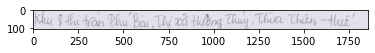

('Tô đến phố Đô, Bc, Phường thườy Cát, Quân bắc Trì Liêm, Xà Nó', 0.8132411290387638)


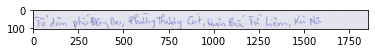

('352 Hưởng lô 2, Hưởng bình Trị Dượg, Quân bình Tan, TP.Hế Chỉ Phính', 0.7969792569751171)


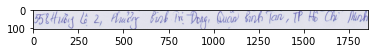

('Đường - 818, Ấp 1, Xã Mỹ Thanh Bác, Huyện Dức Húu, Long An', 0.8378652108126673)


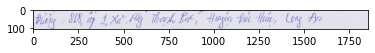

('Lang Từ Pón 4, Xã Yang Nam, Huyện Kóng Chro, Giú Lai', 0.866199252124016)


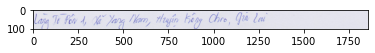

('Lên 6,231-133 Lê Trính Tôn, Phường Bà Trình, Quân 1, TP.HST Chí Minh', 0.8290542331250275)


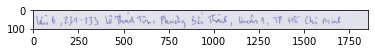

('Sở H/13, Khu phổ Binh Hòa, Phường Lái Thiêu, TX Thuận Anh, Bình Hưng', 0.826651113874772)


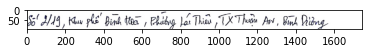

('Khu công nghiệm Sống Đôi, Nai Phong Điển, Huyện Bòn Vẫn Lơi, Có Nau', 0.8157888132689605)


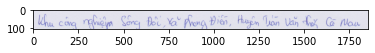

('Số 1/86 B, tô 6, ấp 4, xa-Amlậy, thuyện Dà, Irùng, Binl Diêng', 0.7589053025499719)


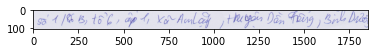

('Đường Võ Nguyễn Giáp, Phương Quyết Tên, Thành Rà Lou Chàn Nao Châu', 0.8157546203019042)


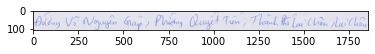

('Tho Các Khê, Xứt Nguyên Khê, Huyện Đông Anh, Hà Nội', 0.8296573772734287)


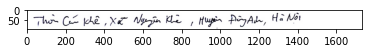

('Nữ Trường 4, Hoàng An Cầm Hải Ples', 0.7326848984641188)


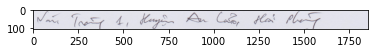

('Tổ 26, Phố Phú Hã, Phương Phong Chưu, Thì Xã Phú Tho, Phú Thọ', 0.9001191898447568)


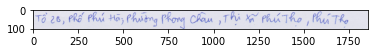

('SJ0 Đứng 6 Trậu, Thị Văn Nững Ay, Huyện Ning Lớp, Thanh Tra', 0.8309376931796639)


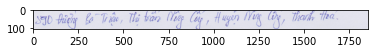

('Thuê 55 1390, Ây 4, Xã Hóy Bid, Huyện Bên Lưẽ S Lany Am.', 0.7730949938164225)


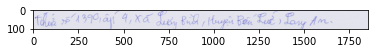

('347/41.25 Lê Vấn Thọ, Phường 9, Quận Gỗ Vấp,TP Hồ Chế Minh', 0.8655428922381895)


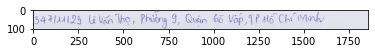

('Thâm 6, Xã Cũ M - Lam, Huyền Ea Sup, Đác Lòc', 0.8161219392310489)


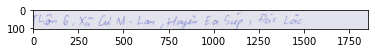

("E'S188p Tân Vĩnh Tuan, xã Tan Ngai, thanh phố Vinh Long, Vinh Long", 0.8600791702893648)


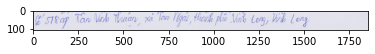

('Tổ 8, Khu Vực 2, Phường Thủy Xuân, Thành phố tuế, Thừa Thiên - Hiết', 0.8554104301911681)


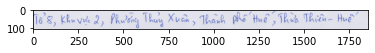

('16 10, ngồ 46, đường Văn Cao, Phúng Liêu Giai, Quần Bị Đình, Hà Nội', 0.8566656137135491)


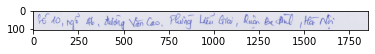

('Vì Nguyễn Văn Trưng, Phường Bên Thanh, Quận 1, TP Hồ Chí Cllinh', 0.8605619255039427)


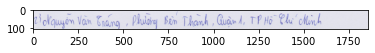

('Số 273 Tổ Hiệu, Phương Nghứ Tân, Quán Của Giấy, Hồi Nợi', 0.8574472980065779)


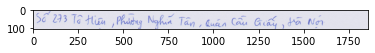

('243 HOANG VAN THU, 7.422, Q.7B QUÂN TÂN BÌN 5, IM CHÍ MINH', 0.7958069890737534)


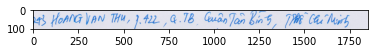

('Tổ 20 Hòn Nghè, xã Vĩnh Ngọc, Thành phố Nha Trang, Khanh Hà', 0.8966679557905359)


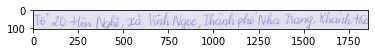

('455 Ấp Mới 7, Xã Mỹ Hình Năm, Huyền Đức Tiên, Long An', 0.8617606927763741)


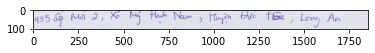

('Số 248 Ngô Gìa Từ, Phường Bình Đình, Thi Xã An Nhón, Bình Bình', 0.8582850093803098)


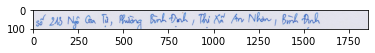

('M40 A Phạm Nhu Tăng Phường Hoà Khi Quận Unh Khi, Đà Vẫng', 0.8296034575573036)


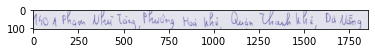

('Sf 632 Tố 4, Thanh Trung, Thanh Tây, Huyện Tiền Bản, Tây Mul', 0.8904529482126236)


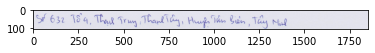

('Tiên Cũ Được Thyến ĐNS Lép, Lang Ed', 0.8030745987381254)


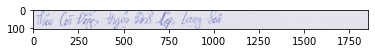

('Tổ 1, Áp Thanh Phú Xã Phánh Am, Huyện An Phú, An Giang', 0.8563488484532745)


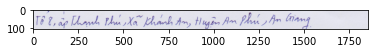

('Lừu Hoàng, Huyện Ung Hoà, Hà Nội', 0.8966294005513191)


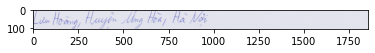

('Thôn Thạch Vấn 2, Thị Trấn Văn Lanh, Huyền Văn Canh, Bình Định', 0.8831894364087812)


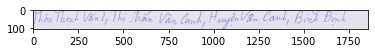

("Tô 'C, Thành phố Yêr Bái, Yên Bai", 0.8671703618584257)


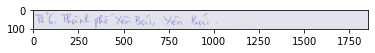

('Số 254B Phổ Thuỷ Khuê, Phường Thuy Khuê, Quận Tây Hồ, Hà Nông', 0.8870432799468275)


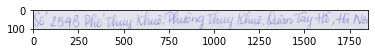

('Nổ 23, Phương 2, Thàh phố Bảo Lọc, Lam Đông', 0.842743213093558)


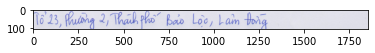

('80C Gọ Cad, Phường Phú Huấn, Quảng 9, IP Hồ An/Minh', 0.8217550691436318)


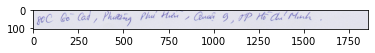

('Số 40 Phạm Húc Lớn, Phường Phú Mỹ, Quân 7, PHó Chí Minh', 0.8651276404207403)


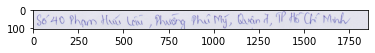

('62 Phạm Hồng Thái, Thanh phố Long Xuyên, An Giang', 0.9143428480138585)


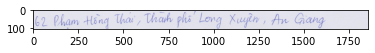

('157/1B Búc Minh Trọc, Phường 5, Quán 8, TP Hồ Chí Minh', 0.8660327819762407)


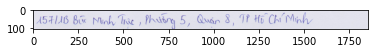

('Khu vức I, Thì hiến Đông Thãnh, Huyền Đức Huế, Long Đn', 0.8754981701020841)


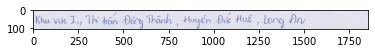

('AS/ 60 (1A Cấu Xéc, Phòng Tần Quý, Quảo Tân Phú, Tp USUi Ana', 0.8015779914955298)


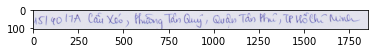

('Sẽ Ol đức ng Viên Hưng Đạo, Phố cng 3. Thành Phố Đã Lạt. Lần Đồng', 0.8186880421179992)


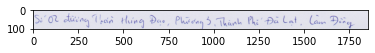

('A3) Hãng Hữu Nam, Phường Tơn Phú, Quân 9, TP Hệ Ck Minh', 0.8221756677735935)


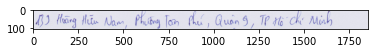

('Thá 2. Xã Lan Pluc Phuận Ham Tan sbình Thv Ov', 0.7864111731449763)


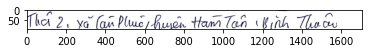

("Sc'ISG Xã Đơn 2, Phường Nam Đồm, Quân Đồng Tà. Hà Nộ;", 0.7983947463755338)


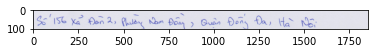

('09 Út Lịch, Phường 4, Đuận Tân Bình, TP Hồ Chí Minh', 0.8849154617272171)


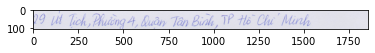

('Khu Ngư Viện, Xã Hong Xuyên, Huyện Ki.L Môn, Hải Dương', 0.8731981598668628)


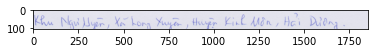

('40 Bà Huyện Thanh huạr Quân 3, TP. Hỗ Chi Minh', 0.8647398099951122)


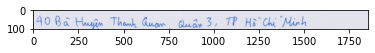

('42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 4, TP Về Chỉ Minh', 0.8874993538483977)


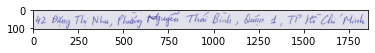

('Thôn Hoàng Long, Xã Đảng Xa, Huyện Gia Lâm, Hà Nội', 0.9133050835132599)


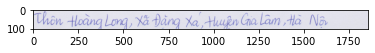

('KP FG/IS cấp 6B, Xã Vĩnh Lộc R, Huyện Bình Chính, TP Hồ Chí Minh', 0.8673227876424789)


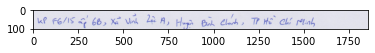

('Thôn Ninh Tần, Xã Quang Minh, Huyện Gia Lộc, Hải Dương', 0.9040689369042715)


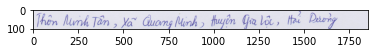

('Số 2yslA110 Về Hich Này, Phố Chỉ Nghị Auàn Vào, Tphố Chỉ Ngh', 0.6738527193665504)


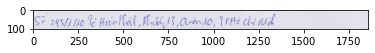

('Ió Trần Cao Văn, Thành phá Tan Kỳ, Quảng Nom', 0.8602772510864518)


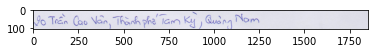

('Xáp 3, Xã Ichánh Hộ, (Huyện U Minh, Gà Mau', 0.8523109941965058)


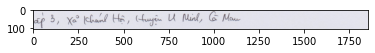

('Tổ 3, thi tiền và lum, Huyện thăn, bình, Quản, Nam', 0.8597077779471874)


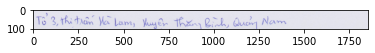

('Pu/S7k dữ 6, Xa VIS lóc A, Thuyên Bịns (haus, Tỷ (6 Chi Mus', 0.7732057736839278)


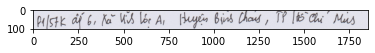

('6 KP4, Phường Tân Quy, Quân 7,TP Hồ Chi Minh', 0.8704932074655186)


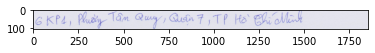

('Thị trấn Uyên hứng, Thị xổ Tân Uych, Bình Dương', 0.8942703959789682)


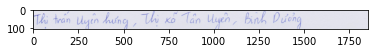

('cp 5, xã Nhị Thuế, kuyện Phú Thia, log Sm', 0.7480497563757548)


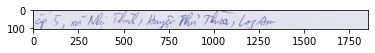

('Ohưng Ecn, Huyện thuập Nhàu, còn La', 0.8062654393059867)


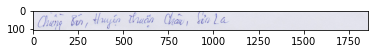

('Xêm Quang Tch, Xã Kỳ Khong, Thuyên Kỳ Anh, Hà Tỉnh', 0.8666211813688278)


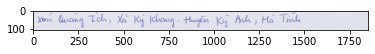

('Thôn Xuân Dực l, Xã Xuân Ninh, Huyền Hưởng Minh, Huảng Bình', 0.8861714995513528)


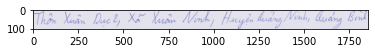

('Tổ BS Khu g, Phường Quang Rung, Hanh phố Uông Bi, Quảng Ninh', 0.893917036553224)


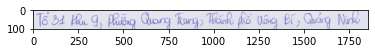

('63 Tồn Hột, Phường 13, Quận Tồn Bình, TP. Hồ Chí Minh', 0.8659550093536107)


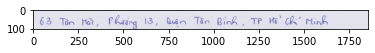

('Thôn Rão Thù, Xã Trường Xươn, Khuyện Aubong Ninh, Quảng Bình', 0.8853143850962321)


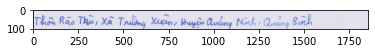

('Toòi nhà VCCI, 474 Võ Thị Sản, Phương 0 7, Quận 3, TP Hồ Chí Minh', 0.8549537874185122)


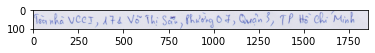

('Sĩ 57BKhu lain sau, Quận tông bang, thu Phong', 0.8519958131843143)


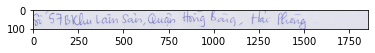

('Thị tiêu ba tờ, Huyện Ba Rở, Quảng Ngài', 0.8170913962217478)


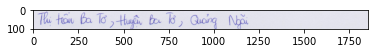

('68 10, phố Chùa Bốc, Phường Quang Hung, Quản đồng Đa, Hà Nội', 0.854354768494765)


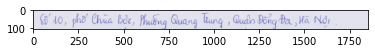

('Số 96, Phổ Me, Thị Trân Ma, Huyền Gia Viến, Ninh Bình', 0.8636514786279427)


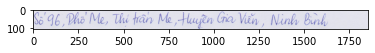

('Số nhĩ 9, Lê Ang Đôn, tố 9, Phường Nguyên Trối, TP Hà (vang, Hà Giang', 0.8534525129674138)


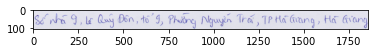

('08 tổ 1, ap Đồng Trung, Xã Tân Chính, Huyện Cần Được, Long An', 0.8653116851556496)


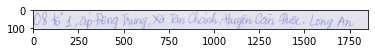

('24 Đường 96, Phương Thanh Nỹ Lới, Quận 2, TP Hà Chế Minh', 0.872604803581323)


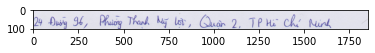

('Đội 10, thôn Thường Dương, Xấ Nam Thung, Huyện Nam Sách, Hàu Dilong', 0.8901378676962497)


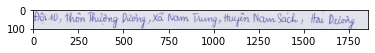

('Klu3, Xã Cót Quê Huyện Hoà, Pức Hà Nội', 0.8129008749597951)


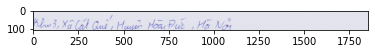

('Số W, Nữ Vu Bau Phương Lim Mã, Quản Ba Đình Tên Nó', 0.7782918007671833)


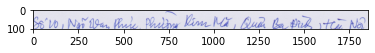

('145 Nguyễn Đình Chính, Hưởng 11, Quận Phủ Nhuộn, TP Hà Quí Minh', 0.8845820119456639)


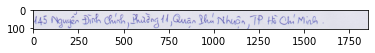

('Phố Vạng xá Nghỉ Đào, Huyện Thuấn Thanh, Bai Nou', 0.8207318503409624)


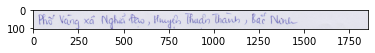

('155 b bình thái, (hướng 11, Quộn 41, TP Hệ Chị Mình', 0.8453009560996411)


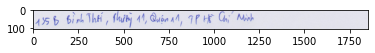

('Xám Đình, thôn 3 Phú ổ, Xã hình Phú, Huyện Thạch Thất, Hà Nộ', 0.9029894322156906)


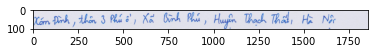

('56-Pham Văn Đình, Phường Hoa Khanh, Bác, Huân Liên Chiếu, Đi Năng', 0.8551539966693291)


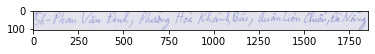

('Tổ A, An Suân Đó, Xã Dương B, Huyền Phút Quốc, Viên Cnong', 0.8782071471214294)


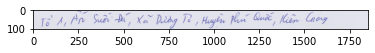

('3 2/2, Số Thừ Cố, Xã Bad Mình Huyện Taug Bom, Đồng Mau', 0.7848273899268221)


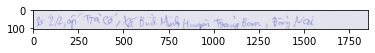

('Ấp Trạm Bơm, Xổ Tân Phú Trung, Huyện Cú Chi, TP Hồ Chí Minh', 0.8822274021172928)


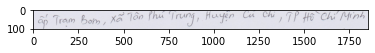

('AS [54 Hỗ Van HE, Phường 0%, Quân Phú Nhuân, TP. Hì Chí Ainh', 0.8277961773176988)


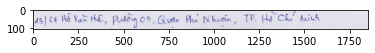

('Số 111/2 Y Ngàng, Phường Tân Tiên, TP Buồn 410 Thuật, Đài Lắc', 0.8254809902339685)


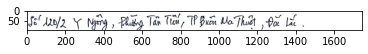

('Khu phố s., Phường Ba Đìn, Thị xã Ea Đồn, Budry Bình', 0.8373178255099517)


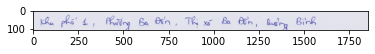

('Số 2/7 Nguyễn Huynh Đức, Phường 2, Tranh Viên Mỹ Tho, Tiên Giang', 0.8633560568559915)


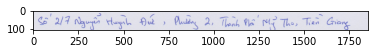

('411 Quang Dung, Phuơng 10, Quan Gỡ Vop, TPHE Uhin', 0.861072703891871)


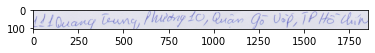

('Tổ 1, Khôm 1, Ví tán ứi tân, Huyện hi ôn, An Giang', 0.7522492681443691)


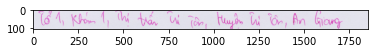

('Và Pi trong, Xở P, Toong, Huỳ, Máng la, Sản là', 0.812243044052435)


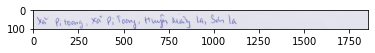

('Xóm Yên Thình, Xã Nghi Xuân, Huyện Nghi Lọc, Nghệ An', 0.9101814593260105)


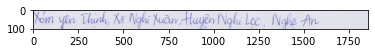

('Sở 236 Hoàng Công Chất, Phường Phú Diễn, Quân Bắc Từ Liễm, Hà Nội', 0.8534795132967142)


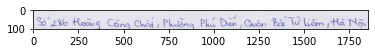

('920/22b lê lời 2.03, phương 3, Quiền Gử lập, TP Hõ Chí Minh', 0.8373296811419019)


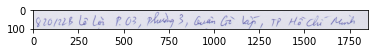

('4 Từ Tượng Khuyên Diện Chính, Cương Hoa', 0.7641383115297709)


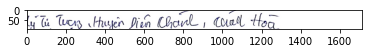

('Đời 1 Hòn Đồng Thường, Xã Đồng Yên, Huyện Quốc Oài Hà Nộv', 0.8538905366470939)


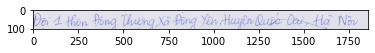

('74 Ngô Gia Tự, HưBng Phước Tiên, Thanh Phố Nha Trang, Khaul Hóa Nội', 0.8620126672200302)


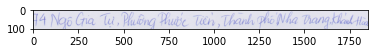

('7512 Thế Lan Viên, Phường Tây Thạnh, Quân Tân phú, TP Hồ Chí Minh', 0.8748951948606051)


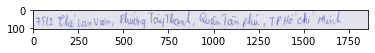

('Thên Văn Sau, Xã Văn Hồi, Huyện Tam Dương, Vĩnh Phục', 0.8891135242122871)


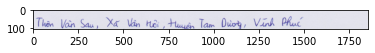

('150 Phó Voy, Fluiờ, Phương Liệt, Quá, Thas Xuân, Hì Nội', 0.8541584421287883)


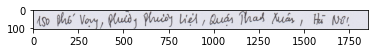

('0b Phan kế binh, Phương Đa Kao Quan 1, TP Hộ Uui Mul', 0.8416503736606011)


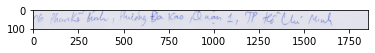

('Hàng Vường, Ấp Cầu Đồn, T7 Huyệnh Hữu Nghió, Huyện Mỹ Tú, Só Trăng', 0.8687076187043479)


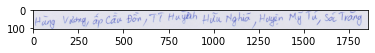

('V/10/32 Trần Bình, Trong, Phương S, Quân Bình Thạnh, TPHa Chỉ Minh, TPHa Chí Minh Thư Nhiều Trị Nam Thức', 0.7197905939358932)


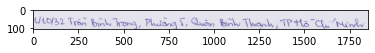

('05 Lê Nanh Trịch, Phường Phước Hỹ, Quan Sen Tàa, Đã Võng', 0.8431381812053067)


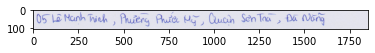

('17A1 Nguyễn Ngọc Phương, Phường 19,Quận Hình Thanh, TPHố Chí Minh', 0.8711467442604212)


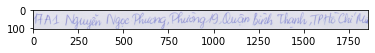

('Số 29/27 được Liên Mù, Pluông flui Hơn Quin Bác Tả Lướn, Hà Nội', 0.800813479082925)


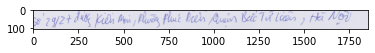

('Số 161282153, đương Kim Giang, Phường Đai Kìm, Quận Hoàng Mai:Thê Này', 0.8769652735495913)


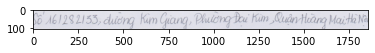

('Thòw Khúc Bo, Xã Nau Lâm, Huyện Đồng Anh, Hà Nội', 0.8471788372844458)


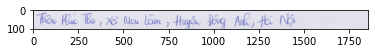

('Số 72/4 Trường Quốc Dung, Phường, N0, Quận, Phú Nhuận, TP H5 Chí - Minh', 0.8793184698467523)


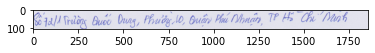

("IT 'ISLY5, An Sòn Long, Xã Sơn Đình, Huyện Chỗ Lach, BER Tre", 0.7996371990690628)


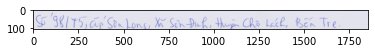

('Thên Tân Xên, Xã Ealy, Huyền Sông Hình, Phút Xứn', 0.8621554629256328)


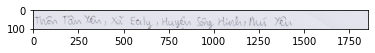

('Số nha 7A, khu 17, Phương Ngọc Châu, Thanh phố Hai Phòng, Hỏi Dus', 0.9014412916623629)


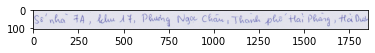

('KP 1, Phường Phước Bình, Thị Xấ Phước Long, Bình Phước', 0.9245811060622886)


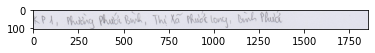

('Tố dân phố Trung bình, phuồng Dướy Nôi, Auận Hà Đông, Hà IVội', 0.855123334732212)


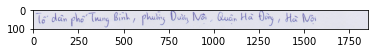

('63/10 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP. Hai Chí Minh', 0.868845580611378)


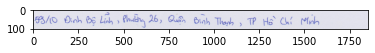

('Số 13618, KP2, Phường long Bình, Thanh phố Bản Hoà, Đồng Nam', 0.8568480178713799)


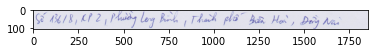

('Phườu Thanh Sơn, Phường Thanh Sởn, Thành phố Vòng Bí, Quảng Ninh', 0.8674554447643459)


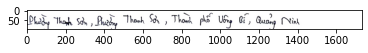

('541/45 Truỳ, Chiếu, Phường A4, Guân Văn bình, Tf. Hồi Chí Minh', 0.7952832149401787)


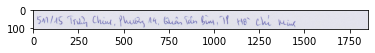

('390A Ngô Gia Tư, Phương 04, Quán 10, TP Hồ Chi Minh', 0.8689780813806197)


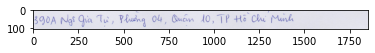

('Xôi Hoa Mỹ, Xã Hoạ Xuy, Phuyên Các Trước, Có Mau', 0.8040763890991608)


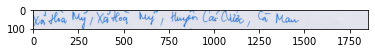

('127 đường số 5, Phương Phước Biển, Quân 9, TP. Hơ Chí Minh', 0.8738666680352442)


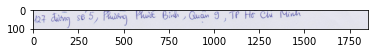

('Số 696 / 13, Chu phố Tớn Phước, phưởng Tân Bình, TX Dĩ An, Sĩnh Oướng', 0.8610190934893014)


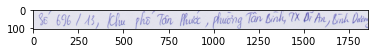

('18 Ni Sự Kiuỳch Liên, Phương 10, Quân Tên Bình, TPHa Chí Minh', 0.8306777033893789)


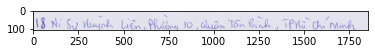

('32B, Lõ K/Ll, Đường DE 4, Phường Thái thần, Thì xã Bàn Cát, Bình Dường', 0.8275057703256607)


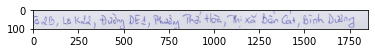

('342 Đường B, phường 25, Quòn Bình Thanh, IPH6 Chế Minh', 0.852695502616741)


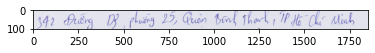

('Số 617/10 hói Sởn, Phường 11, Thành Khố Dừng Tàu, Bà Hò - Vũng Tàu', 0.858665903183547)


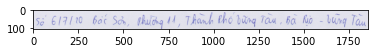

('Tho Hu, Xã Kiêu Nổ, Huyện Hồng Anh, Hồ V5', 0.8378468221280633)


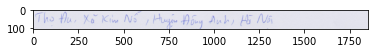

('215 B8 Lđ buoy đạih, phương 7, lượn bình thanh, TP Hồ cai MM', 0.7715303622186184)


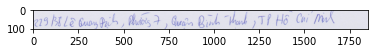

('25 - 27 clê Đại thanh, Phường Lê Đại Hành, Quận Hai Bà Tương, Hà Nội', 0.8614540288553518)


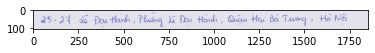

('42A Nguyễn Chí Thanh, Phương 03, Auại 5, TP. Hơ Chí Minh', 0.884372852742672)


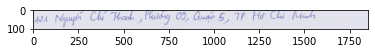

('Số Lự đó 3, ấp 14. Xô long Thành, Huyện Cai lây, Tiên (niana', 0.8402015914519628)


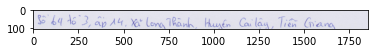

('138B Gỹ Dân, Phủng Bên Quy, Quận Bà, Phúi, TP Hà Các Minh', 0.8160846960126308)


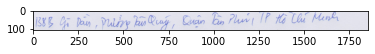

('Ba, Mẫn, An Trạch A, Đuyên Đông Hải, Bạc Liêu', 0.8702571305963728)


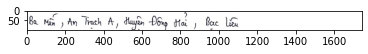

('Xã Ninh Khai, Huyện Vũ Thì, Thái Bình', 0.8780042376067188)


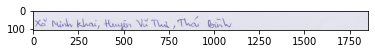

('Số 36/342 đường không đình, phường hạ đình, auận, thoanh xuân, hà nội', 0.8671633113121641)


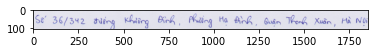

('Ấp 8 xã Khép Thanh, Huyện Châu Thành, Long An', 0.8701722138457828)


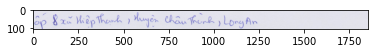

('8 9/7140 Phòng Sẽ 8, Phùng 11, Quân Cổ Vấp, TP Hế Của Minh', 0.8105786743349043)


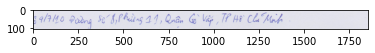

('Cộ Vĩnh Teà, Huyền Vĩnh Thanh, Cần Thứ', 0.8265131111992033)


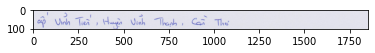

('1120 Nguyễn Nếu Dung, Mường 6, Quân Gó Vớp, TP. Hồ Chí Anh', 0.8326566630396349)


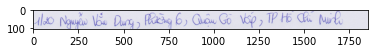

('102 Phan Văn Hơn, Phường Tài Tiế, Nhất, Quận 12, TP. Hà Cuí Minh', 0.83937366027385)


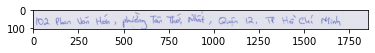

('Xã K231 Nguyễn Văn Thoại, Phường Phước Mỹ, Quận Sơn Trà, Đã Năng', 0.9090952798724174)


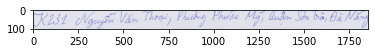

('Cẩm Huy, Huyện Cẩm Xuyên, Hà Tỉnh', 0.8769464158650601)


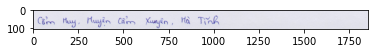

('18 A1 S?1/0 Lê Văn Sỹ, Phường 1, Quân Tao Rình, TP. Hế Oại Ninh', 0.8113743140110894)


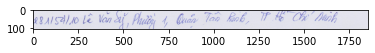

('Số 4/4% Phạm Hiếu Điểu, Phường Niềm Nghĩa, Quản Lê Chân, Hỏ Phong', 0.8903438765269059)


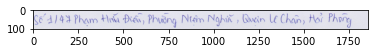

('3 Tăng Bạt Hổ , Phưởng 12, Quận 5, TP Hồ Chí Minh', 0.8771710626933039)


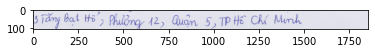

('Xo Thanh Tuyển, Huyện Thanh Liêm, Hà Nam', 0.9179762005805969)


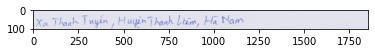

('Xơn Anh Hung , Xã Phương Lóc, Huyện Can Lộc, Hà Tinh', 0.8582341332848256)


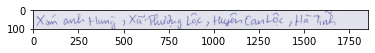

('Ấp 3, Thị Trấn Ngà Năm, Thị Xã Ngà Năm, Sóc Uạng', 0.843701807782054)


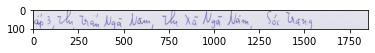

('Số 73, tổc, k04, phương trong dài, thành phố bên thàn, đồng nai', 0.8362111087356295)


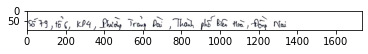

('36913D, Ấp An Phong, Xã An Thạnh, Huyện Mỏ Cay Nam, Bến Tre', 0.912799666493626)


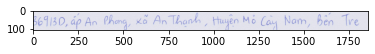

('Thần 41, Muyên Tiên, Phước, Quảng Nam', 0.8768737694701633)


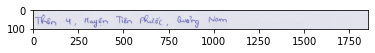

('453/101 ED Huynh Tác Phát, Phương Bình Thuên, Quân 7, TP Hề Chí Minh', 0.8448387443581048)


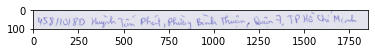

('20 Đường số 27, Phường 6, Quận Go Vấp, TP. Hồ Chế Minh', 0.8458795221867385)


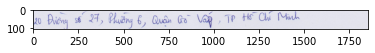

('Xéu dễ ALE8 Vín Gi Nguyễn xã Nguyễn luy, Huyện Kin lay, Hồ Nơm', 0.7637031873868357)


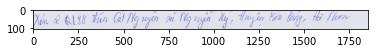

('khu 9, Xã Hung lô, Thành phố Việt Trì, phú Thọ', 0.8930924133114193)


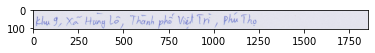

('620N2F C/X Nguyên Thông, Phưởng 11, Quận Bình Thanh, TP Hồ Chí Minh Thứ Nội', 0.8318596454461415)


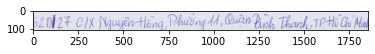

('36/27 Huynh Thiên Lộc, Phương Tba Thạch, Quận Nam Phí, TP Hễ Chỉ Pgia', 0.8399569720461748)


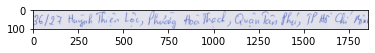

('23 Nguyễn Aửa Đam, Thuỷng Tân Sơn Nhữ, Auân Lớn phu, TP Hồ Chí Minh', 0.8173428931787833)


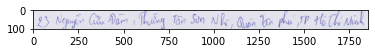

('1992 (Viêu Thôn, P. An Nghiệp, Phường An Nghúp, Quan Ninh Dâu, Lần Thổ', 0.8212706306150981)


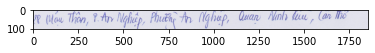

('27 B3 KP Binh Minh 1, Phương Đế An, Tx Dĩ An, Binh Dương', 0.8671525551804474)


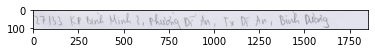

('Khối 3, Rê Hán Núi Thình, Huyền Nó Nanh, Quang Nam', 0.8536265617609025)


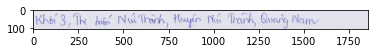

('345 - 377 Nguyễn Thức Bình, Phường 2, Quận Tin Bình, P ttt Uuy Minh', 0.8419799633435349)


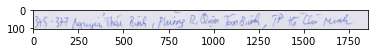

('Thôn Hữu Tàn, Xã Tòn Ninh Huyện Quảng Ninh, Quảng Binh', 0.8786722857643057)


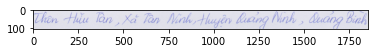

('Số 4, ngở ASS làu Giày, phương Quan tba, quân Cầu Giầy, tlà Nữv', 0.8028717764786312)


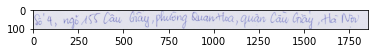

('Sẽ 31 C. đường Đã Triều, Phương 3, Thành Phố Sạc Liêu, Bạc Liêu', 0.8642255526686472)


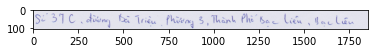

('Đồi 3 Thôn Đông Lư, Xã Đồng Quang, Huyện Quốc Oai, Hà Nội', 0.8943536020161813)


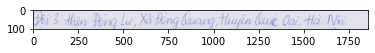

('35A lê Hồng Phong, Thích phủ Nha Trang, Khảo Hoà', 0.8195567081371943)


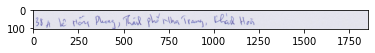

('Thái Trí Thuyển Xã Thuyền Văn Tiến, Huyền Chương Nỹ, Hồ Nội', 0.807676263027272)


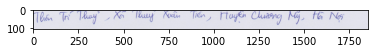

('M [5 ấp 1, Xã Lê Mình Xuân, Huyện, Bình Thanh, 1P Hồ Khi Clính', 0.8440065489661309)


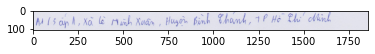

('Tổ cân phố Ngô An Khỏm, Phường Châu Sơn, Thành phố Phủ Lý, Hà Nam', 0.8874184503005101)


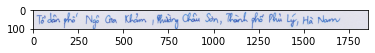

('12817 Đinh Tiên Hoàng, Phường 1, Cuân Bình Thanh, TP Hs Chí Minh', 0.8832997251302004)


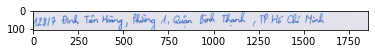

('40 Đô Tham, Phương Có Giang, Quận 1, TP.Hồ Chí Minh', 0.8412306396400228)


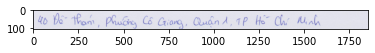

('Xón Chính, Xã Thái Bình, Huyện Yên Sơn, Tuyên Quang', 0.8797450357792425)


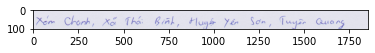

('Thôn Tiên Phong, Xã Hai Hòa, Huyện Tỉnh Gia, Thanh Hoá', 0.9034229119618734)


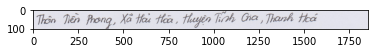

('Mu/8 /25A Vươn Lài Thường Phú Tho Hòa, Quân Tân Phú, TP Hỗ Chỉ Hước', 0.821100310047171)


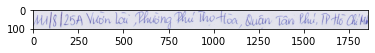

('Số 256, Hồ 41, Phương Hoàng Vấn Thụ, Quân Hoàng Mai, Hê Nội', 0.8542215134632789)


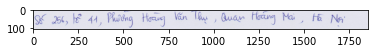

('24 Hoàng Văn Thụ, Phương Phước Ninh, Quân Hải Châu, Đài Năng', 0.865212544798851)


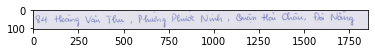

('Nược Sản, Xã Mũi Am, Thi xã Ninh Hoà, Kioch Had', 0.8306012781376534)


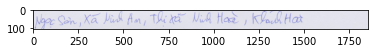

('Ceo 811, Nghệ Anh 80n, Nghệ An', 0.758466903368632)


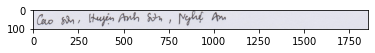

('Ton Phú Gia, Xổ Lộc Teên, Huyện Phú Lậc, Thuề, Thiên - Huế', 0.8400242200185513)


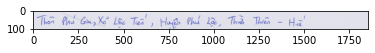

('Thôn Hill 2, Xã Ia Ma Kỏn, Tuyên Iafa Gia Lai', 0.8888071404563056)


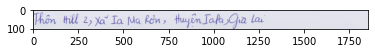

('Tờ A1, Phường Nguyên Rở, TP Hà Giày, Hì Giàng', 0.8710667782359653)


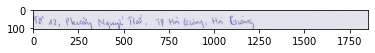

('Sứ 366 A 33 đường Phon Văn Trì, Phưởng 5, Huận Gừ Vập, TP. Hồ chí Trường', 0.8118757468958696)


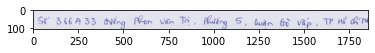

('56 ? 213]1, Ấn Tên 161, Xã Phong Hoà, Huyện Lai Vung, Đồng Tháp', 0.832365295480168)


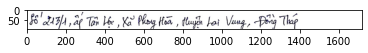

('UF2 Áp Bình Thứng, Xổ Bình Phan, Huyền Chỉ Gọp, Tiến Giang', 0.8451671805875055)


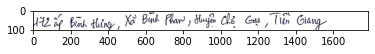

('Ấp 4, Xã Tướ, Thành, Thị xã Đóng Xoai, Bình Phước', 0.8374434796218969)


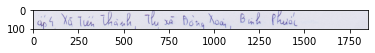

('Phú 26, phường Mường Thanh, Tỉnh điền bên, đến biên', 0.8440791789223167)


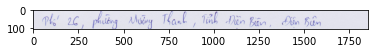

('Xã Lộc Ngoài, Huyện Bảo Lâm, Làm Đồng', 0.8598956965111397)


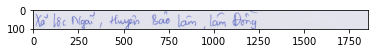

('M7 Nguyễn Trài, Phương 02, Quan 5, TP Hồ Chí Mũl', 0.8893224528680245)


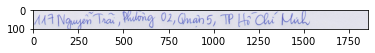

('27 1/7A An 0ướng Nướng, Phường 03, Quan 5, Tp Hồ Chí Minh', 0.8598300218582153)


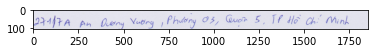

('100 Điỗry 30, Phường Bình Trí Đông B, Quản Bình Toàn, TP.Hồ Chí Minh', 0.8720343196216751)


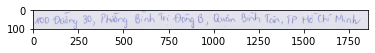

('7 M20la Ấp 7, Xã Phạn, Văn Hà, Huy, Bằng Chính, TP Họ Chú Minh', 0.836140279808352)


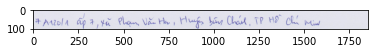

('15 Nỹ, Khu 4, Phười, Hủy Thắng, Thân phố Hạ long, Huang Ninh', 0.847774426266551)


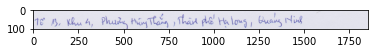

('Số 414 Nguyễn Với, Trời, Thị trấn, M, Lào, Huyện An Làa, Hải Phóng', 0.8379351736018152)


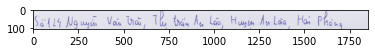

('106 Thấu Thịnh, Quận Đông Đa, Hà Nội', 0.8971101993487941)


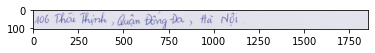

('454 Nguyễn Thị Minh Khai, Phương 05, Quận 3, TP Hà Chí Minh', 0.900779743820934)


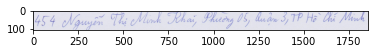

('Xe Mô Lới, Xã Văn Khác, Huyện Cầm (Là, Phục Thị', 0.7446305489444986)


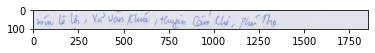

('359/23 lê văn sỳ, phường 12, quận 3, TP Hà chí ninh', 0.8537272571348676)


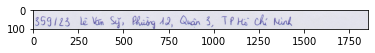

('Thị trấn Thanh Nê, Huyện Việt Xưởng, Thúi Bình', 0.8576355064692704)


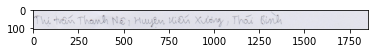

('Xã IAIA, Gị Năm Tính, Xã Lvèủy Vô Đầy Huyện Có Vuốc, Là Mau', 0.7520544400154534)


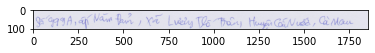

('Tổ 6, KP4, Phiêng Trắng Dõi, Thành phố Biên thoà, Đông Nai', 0.8696286308354345)


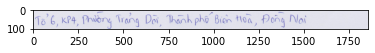

('55 6, TT8, tlu đó Hộ Văn Pha, Hướng Hu la, Quống Hà Đồng, Hai Nội', 0.7762183842750696)


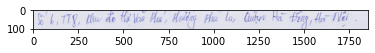

('32 Nguyên Văn Quý, Phùng Phí Phươn, Anê, 7, PHi Ch Phính', 0.786442835948297)


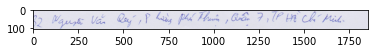

('Đó clôn phố Mỹ Trạch, Phương Ninh Hà, Thủ xeà Ninh Hoa, Khanh Hoà', 0.8492334242050464)


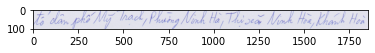

("719 An Có, Phương Tần Thờ, Quận Tên phú, Tp. Hồ Uni 'Miố", 0.7886946007077184)


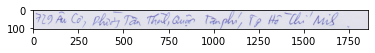

('Dày 1,81, Trên Núi, Phường Cái Khê . Avòn, Nulkúc , (Cầu Thơ', 0.763824441532294)


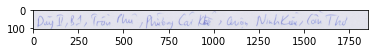

('Xã Thọ Lập, Huyện Thọ Xuân, Thanh Hoá', 0.9205432679202106)


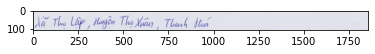

('Đường Vành Đai 2, phương 4, Nhanh phố Cả Man, Là Mau', 0.8608335480093956)


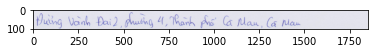

('Sở/200 A, Áp Hòa An, A, Xã Hoà Thuả , Huy Của Giống Riêng, Kiên Giang', 0.8430626526258994)


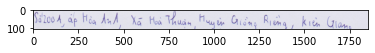

('Xa Trong Nu, Xa Phat Nam 1, Muyen Xen Nas Ing, Neo Bing', 0.7006812053647908)


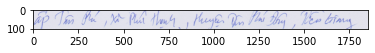

('43 Nguyễn Thì Miền Khu, Phương Hải Châu T, Quốc Hhải Châu, Đã Này', 0.8068624925154906)


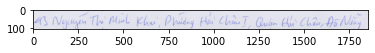

('BS, Hải Tiên Biểu Biểu Phi Đồng, Huyện Điều Biêu Đồng, Điều Biên', 0.7997486121021211)


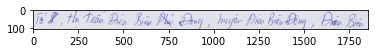

('Số Nhà 71, thân Nam Nghiê, Xã Nan Đà, Huyện Trông Nô, Đất Nông', 0.8628066477756346)


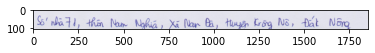

('Đường Hùng Vương, Phường Tân Bill, Thị xã Đông Xoàn, Bãi Phước', 0.8646617599071995)


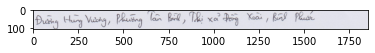

('Số 166 phò Ngọc thanh, phường giảng vỡ, quân ba đình, Hà Nội', 0.8557264337937037)


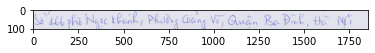

('6 Xây, Lô 6, Phu 9.0 la, phường lài qui, Onân Bat Đời, (tà Ngi', 0.7407423630356789)


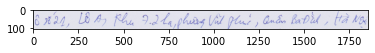

('Thôn Thuận Hưng, Xã Thuần Hạnh, Huyện Đắk Sông, Đắk Nông', 0.8917265364101955)


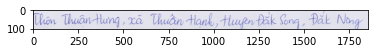

('158 Đoàn Văn Bỏ, phương 09, Quận 4, TP. Hồ Chí Minh', 0.9027973343344295)


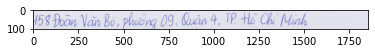

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [19]:
import glob
from pathlib import Path

# len([path for path in Path('./ocr_dataset').rglob('*.jpg')])
# len([path for path in Path('./mcocr_public_train_test_shared_data').rglob('*.jpg')])
for path in Path('./Vietnamese-HTR/data/0916_Data_Samples_2').rglob('*.png'):
    # print(str(path))
    img = Image.open(str(path))
    plt.imshow(img)
    s = detector.predict(img, return_prob=True)
    print(s)
    plt.show()
# len([path for path in Path('./scenetext_dataset').rglob('*.png')])

# print(len(glob.glob("./ocr_dataset/en_00/*.txt")))
# print(len(glob.glob("./ocr_dataset/en_01/*.txt")))

In [ ]:
import json
root = "/content/Vietnamese-HTR/data/"

def create_vietocr_annote(root, img_dir_name, output_name):
    #read the file
    with open(root + img_dir_name + "/labels.json") as file:
        labels = json.load(file)
    data = []
    for img_name in labels:
        data.append(f"{img_dir_name}/{img_name}\t{labels[img_name]}\n")


    #write back the file
    with open(root + output_name,"w") as f:
        f.writelines(data)
create_vietocr_annote(root, "0916_Data_Samples_2", "train_annotation.txt")
create_vietocr_annote(root, "1015_Private_Test", "test_annotation.txt")

# Model exploration

## Transformer

In [3]:
from torch import nn
from vietocr.tool.translate import translate, process_input
class OCR_Detector(nn.Module):
    def __init__(self, model, image_height = 32, 
                 image_max_width = 512, 
                 image_min_width = 32):
        super(OCR_Detector, self).__init__()
        self.model = model
        self.image_height = image_height
        self.image_max_width = image_max_width
        self.image_min_width = image_min_width
    def forward(self, img):
        # img = process_input(img, self.image_height, self.image_min_width, self.image_max_width)
        return translate(img, self.model)


In [12]:
config = Cfg.load_config_from_name('vgg_transformer')

config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


File exists: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


In [5]:
detector.model

VietOCR(
  (cnn): CNN(
    (model): Vgg(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace=True)
        (13): AvgPool2d(kernel_size=[

In [13]:
from torchinfo import summary
summary(OCR_Detector(detector.model), (4,3,32,512))

Layer (type:depth-idx)                                                           Output Shape              Param #
OCR_Detector                                                                     --                        --
├─VietOCR: 1                                                                     --                        --
│    └─CNN: 2-1                                                                  [256, 4, 256]             --
│    │    └─Vgg: 3-1                                                             [256, 4, 256]             20,166,720
│    └─LanguageTransformer: 2                                                    --                        --
│    │    └─PositionalEncoding: 3-2                                              [256, 4, 256]             --
│    │    └─Transformer: 3-3                                                     --                        17,363,968
│    │    └─Embedding: 3-4                                                       [1, 4, 256]       

## Seq2seq

In [8]:
config = Cfg.load_config_from_name('vgg_seq2seq')

config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpdj_inoqe/dl
100%|██████████| 89.6M/89.6M [00:00<00:00, 2

In [10]:
detector.model

VietOCR(
  (cnn): CNN(
    (model): Vgg(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace=True)
        (13): AvgPool2d(kernel_size=[

In [11]:
from torchinfo import summary
summary(OCR_Detector(detector.model), (4,3,32,512))

Layer (type:depth-idx)                        Output Shape              Param #
OCR_Detector                                  --                        --
├─VietOCR: 1-1                                --                        --
│    └─CNN: 2-1                               [256, 4, 256]             --
│    │    └─Vgg: 3-1                          [256, 4, 256]             20,166,720
│    └─Seq2Seq: 2-2                           --                        --
│    │    └─Encoder: 3-2                      [256, 4, 512]             920,832
│    │    └─Decoder: 3-3                      [4, 233]                  1,283,561
│    │    └─Decoder: 3-4                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-5                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-6                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-7                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-8               

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [8]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

## Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


### Config 1: Transformer

In [9]:
config = Cfg.load_config_from_name('vgg_transformer')
config2 = Cfg.load_config_from_name('vgg_seq2seq')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/Vietnamese-HTR/data/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':10000,
          'checkpoint':'.drive/MyDrive/checkpoint/transformerocr_checkpoint.pth',    
          'export':'./drive/MyDrive/weights/transformerocr.pth',
          'metrics': 10000
         }

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['dataloader'].update(dataloader_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': './img/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'data',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/transformerocr.pth',
  'iters': 100000,
  'log': './train.log',
  

### Config 2: Seq2seq

In [10]:
config2

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': './img/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'data',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4',
  'md5': 'efcabaa6d3adfca8e52bda2fd7d2ee04'},
 'quiet': False,
 'seq_modeling': 'seq2seq',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/transformerocr.pth',
  'iters': 100000,
  'log': './train.log',
  'metrics': None,
  'print_e

## Training
You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()